In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

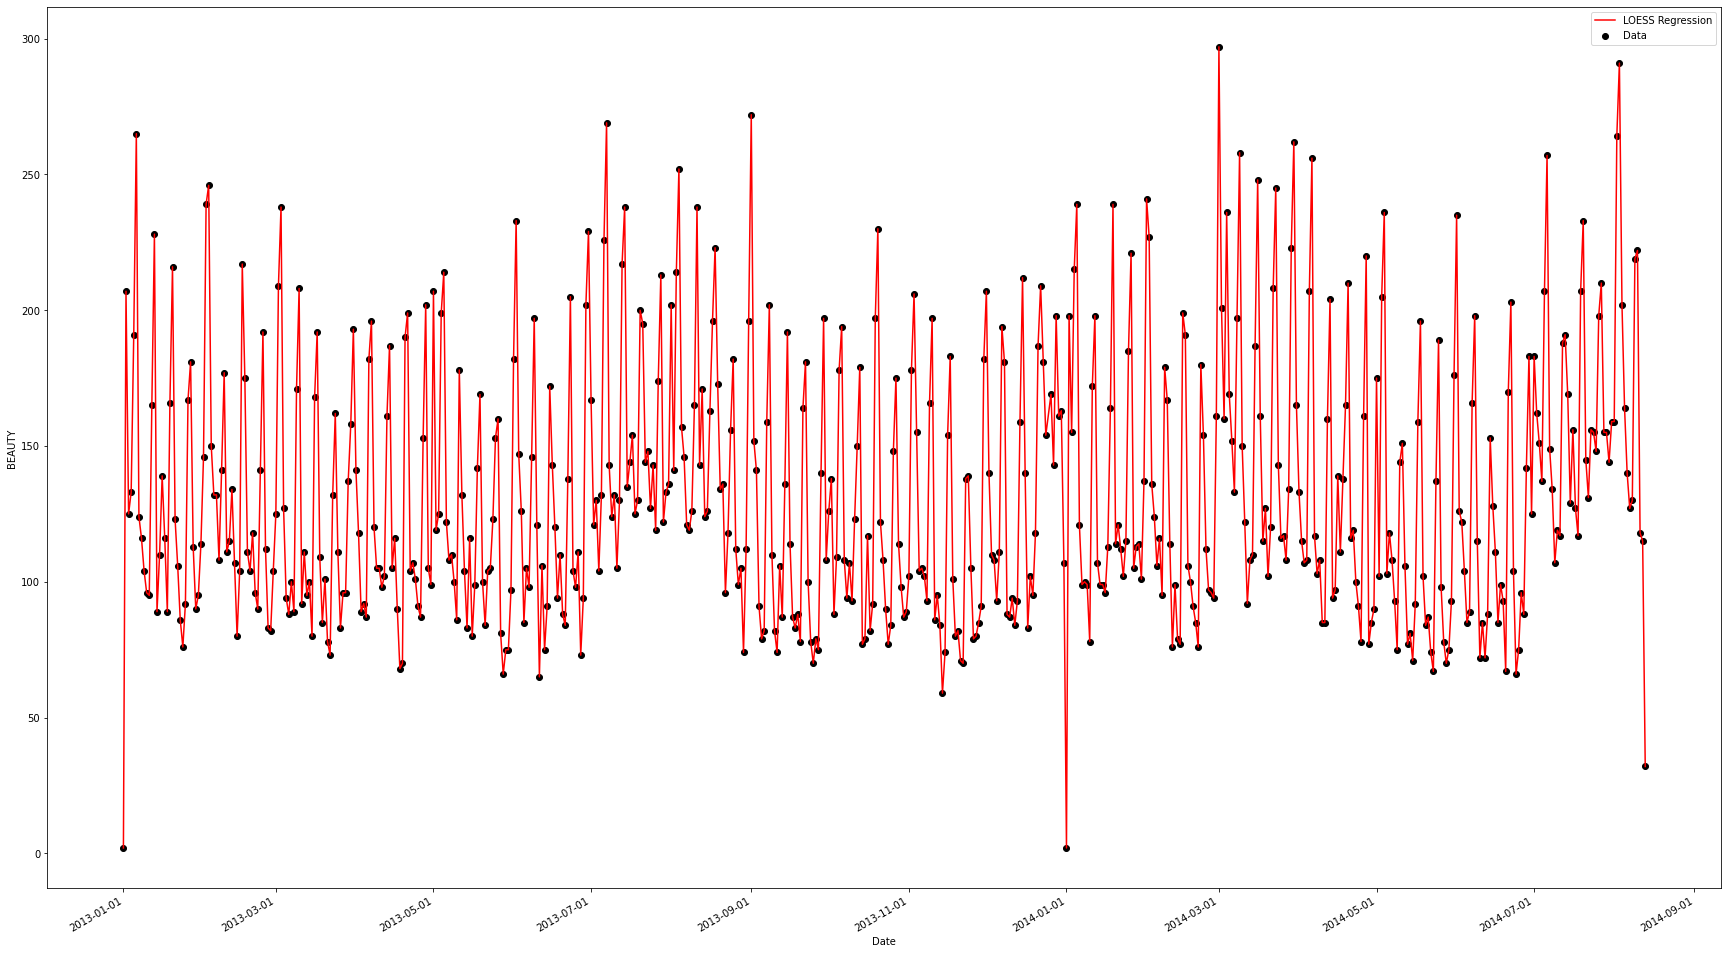

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# CSVファイルからデータを読み込む（日付を解釈する）
df = pd.read_csv('store_sales.csv', parse_dates=['date'])

# XとYの列を取得
X = df['date'].values  # 日付データのまま取得
y = df['BEAUTY'].values

# 局所線形回帰の関数を定義
def calculate_weights(x, x_i, tau):
    import warnings
    # 警告を無視する
    warnings.filterwarnings("ignore", category=RuntimeWarning)

    # x_i を datetime から float に変換
    x_i = x_i.timestamp() if isinstance(x_i, pd.Timestamp) else x_i

    # 重み付け関数の計算
    weights = np.exp(-(x - x_i)**2 / (2 * tau**2))
    return np.diag(weights)

def locally_weighted_regression(x, y, x_i, tau):
    x = x.astype(float)  # x を float 型に変換
    x_i = float(x_i)  # x_i を float 型に変換
    weights = calculate_weights(x, x_i, tau)
    model = LinearRegression()
    model.fit(X=x.reshape(-1, 1), y=y, sample_weight=weights.diagonal())
    return model.predict([[x_i]])

def plot_loess_regression(X, y, tau):
    y_pred = [locally_weighted_regression(X, y, x_i, tau) for x_i in X]

    # 新しい図を作成し、サイズを調整
    fig, ax = plt.subplots(figsize=(30, 18))

    ax.scatter(X, y, color='black', label='Data')
    ax.plot(X, y_pred, color='red', label='LOESS Regression')

    # x軸のフォーマットを設定
    date_format = DateFormatter("%Y-%m-%d")
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()  # 日付が重ならないようにフォーマットを調整

    plt.xlabel('Date')
    plt.ylabel('BEAUTY')
    plt.legend()

    # 図を表示
    plt.show()

# tauを設定して局所線形回帰を実行
tau = 1.0
plot_loess_regression(X, y, tau)

In [4]:
#欠損値の確認
print(df.isnull().sum())
#範囲の確認
print("Min:", np.min(X), "Max:", np.max(X))
print("Min:", np.min(y), "Max:", np.max(y))

date                          0
AUTOMOTIVE                    0
BABY CARE                     0
BEAUTY                        0
BEVERAGES                     0
BOOKS                         0
BREAD/BAKERY                  0
CELEBRATION                   0
CLEANING                      0
DAIRY                         0
DELI                          0
EGGS                          0
FROZEN FOODS                  0
GROCERY I                     0
GROCERY II                    9
HARDWARE                      0
HOME AND KITCHEN I            0
HOME AND KITCHEN II           0
HOME APPLIANCES               0
HOME CARE                     0
LADIESWEAR                    0
LAWN AND GARDEN               0
LINGERIE                      0
LIQUOR,WINE,BEER              0
MAGAZINES                     0
MEATS                         0
PERSONAL CARE                 0
PET SUPPLIES                  0
PLAYERS AND ELECTRONICS       0
POULTRY                       0
PREPARED FOODS                0
PRODUCE 

In [2]:
# 'GROCERY II' 列の非数値データを0に変換
df['GROCERY II'] = pd.to_numeric(df['GROCERY II'], errors='coerce').fillna(0)
#print(df.isnull().sum())
#print(df['GROCERY II'].unique())

NameError: name 'df' is not defined